In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
loss_list = []
torch.manual_seed(42)

In [3]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        # x = self.activation2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def train_one_epoch(epoch_index):
    total_loss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / (len(train_data_loader) * batch_size)

EPOCHES = 10000
loss_list = []

for epoch in range(EPOCHES):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{EPOCHES}, LOSS: {avg_loss}")


XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): ReLU()
)


/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0/10000, LOSS: 0.37214417196810246
Epoch 1000/10000, LOSS: 0.21596083543408895
Epoch 2000/10000, LOSS: 1.3145040611561853e-13
Epoch 3000/10000, LOSS: 8.881784197001252e-14
Epoch 4000/10000, LOSS: 1.3145040611561853e-13
Epoch 5000/10000, LOSS: 8.881784197001252e-14
Epoch 6000/10000, LOSS: 1.3145040611561853e-13
Epoch 7000/10000, LOSS: 1.3855583347321954e-13
Epoch 8000/10000, LOSS: 1.3145040611561853e-13
Epoch 9000/10000, LOSS: 1.3500311979441904e-13


('linear1.weight', Parameter containing:
tensor([[-1.9244,  1.9162],
        [-3.5163,  3.4869]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.5972, -2.6076], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.7182,  2.7605]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.5638], device='cuda:0', requires_grad=True))
The input is tensor([0., 1.], device='cuda:0') 
output y predicted = tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


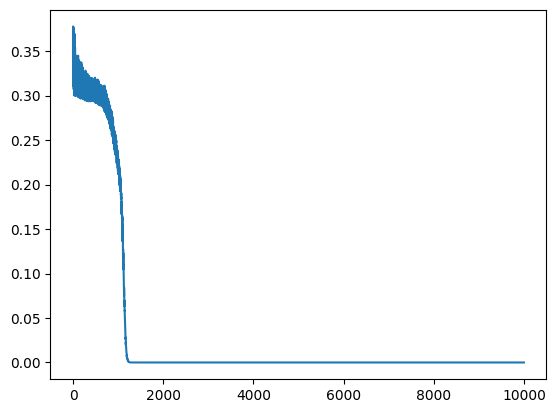

In [5]:
for param in model.named_parameters():
    print(param)
input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print(f"The input is {input} \noutput y predicted = {model(input)}")
plt.plot(loss_list)
plt.show()

In [6]:
# q3

weights_linear1 = torch.tensor([[-5.1631, -4.8568],[-2.2602, -2.2065]], dtype=torch.float32)
biases_linear1 = torch.tensor([1.3139, 2.9795], dtype=torch.float32)


weights_linear2 = torch.tensor([[-5.7169,  4.4677]], dtype=torch.float32)
biases_linear2 = torch.tensor([-1.5865], dtype=torch.float32)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

linear1_output = torch.matmul(X, weights_linear1.t()) + biases_linear1
activation1_output = sigmoid(linear1_output)
linear2_output = torch.matmul(activation1_output, weights_linear2.t()) + biases_linear2
output = sigmoid(linear2_output)

print("Manually calculated output:")
print(output)


Manually calculated output:
tensor([[0.1370],
        [0.7874],
        [0.7856],
        [0.3178]])


In [9]:
# q4

import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28 * 28  
hidden_size1 = 500
hidden_size2 = 200
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

model = FFNN(input_size, hidden_size1, hidden_size2, num_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


